In [1]:
import pandas as pd
from pyvis.network import Network
import math
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

In [4]:
parq_data = pd.read_parquet("Strong_scaling/output.parquet")

In [5]:
parq_data.sort_values("tuple_count", ascending=[False])

,subred_tuples,tuple_count,tup_1,tup_2,tup_1_count,tup_2_count
146495,"[AskReddit, reddit.com]",20289,AskReddit,reddit.com,558862,269354
622572,"[AskReddit, pics]",17855,AskReddit,pics,558862,170566
52086,"[pics, reddit.com]",17146,pics,reddit.com,170566,269354
573606,"[AskReddit, WTF]",13206,AskReddit,WTF,558862,94708
256624,"[WTF, reddit.com]",12994,WTF,reddit.com,94708,269354
...,...,...,...,...,...,...
318443,"[NoPDubClub, johndollarfullofcrap]",1,NoPDubClub,johndollarfullofcrap,5,95
318445,"[Cricket, IPhoneApps]",1,Cricket,IPhoneApps,71,5
318446,"[learnprogramming, nintendo]",1,learnprogramming,nintendo,119,3
318447,"[Life, mentalhealth]",1,Life,mentalhealth,2,2


In [27]:
parq_data = parq_data.iloc[0:25]

In [28]:
nodes = []
count = []
for index, row in parq_data.iterrows():
    if row["tup_1"] not in nodes:
        nodes.append(row["tup_1"])
        count.append(row["tup_1_count"])
    if row["tup_2"] not in nodes:
        nodes.append(row["tup_2"])
        count.append(row["tup_2_count"])

In [30]:
# Create a Pyvis network graph
graph = Network(height='700px', width='1000px', bgcolor='#222222', font_color='white',notebook=True)
i = 0
for item in nodes:
    graph.add_node(item, label = item, size = math.log(count[i])*2)
    i += 1
#Add edges to the graph
for index, row in parq_data.iterrows():
    graph.add_edge(row["tup_1"], row["tup_2"],weight=math.log(row["tuple_count"])*2)
# Show the graph
graph.write_html('example.html')

In [32]:
#Strong_Scaling
labels = [1,2,3,4,5,6]
Actual_runtime_SS = [246.79,217.66,176.63,170.27,196.13,169.74]
Perfect_scaling_SS = [246.79,246.79/2,246.79/4,246.79/8,246.79/16,246.79/32]

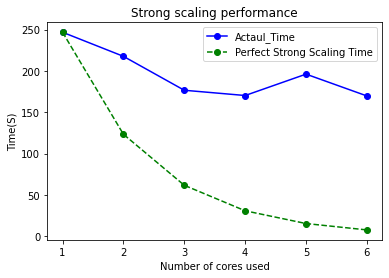

In [35]:
# Create figure and axis
fig, ax = plt.subplots()

# Plot lines
ax.plot(labels, Actual_runtime_SS, color='blue', label='Actaul_Time', marker='o')
ax.plot(labels, Perfect_scaling_SS, color='green', label='Perfect Strong Scaling Time', linestyle='dashed', marker='o')

# Set title and axis labels
ax.set_title('Strong scaling performance')
ax.set_xlabel('Number of cores used')
ax.set_ylabel('Time(S)')

# Set legend
ax.legend()

# Show plot
plt.show()

In [36]:
#Strong_Scaling
labels = [1,2,3,4,5,6]
Actual_runtime_WS = [144.29,126.05,144.38,160.2,155.61,193.21]
Perfect_runtime_WS = [144.29,144.29,144.29,144.29,144.29,144.29]

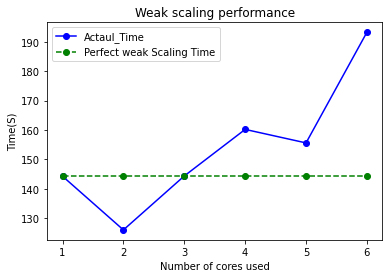

In [38]:
# Create figure and axis
fig, ax = plt.subplots()

# Plot lines
ax.plot(labels, Actual_runtime_WS, color='blue', label='Actaul_Time', marker='o')
ax.plot(labels, Perfect_runtime_WS, color='green', label='Perfect weak Scaling Time', linestyle='dashed', marker='o')

# Set title and axis labels
ax.set_title('Weak scaling performance')
ax.set_xlabel('Number of cores used')
ax.set_ylabel('Time(S)')

# Set legend
ax.legend()

# Show plot
plt.show()